<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: прогнозирование временных рядов</center></h2>

**Мягкий дедлайн:** 23:59MSK 19.05.2024

**Жесткий дедлайн:** 23:59MSK 26.05.2024

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.2/422.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import warnings
import gdown
import pandas as pd
import numpy as np
from copy import deepcopy

warnings.filterwarnings("ignore")

В данной задаче мы будем решать одну из актуальных практических задач, с которыми, в том числе, сталкиваются разработчики ETNA - прогнозирование объема необходимой наличности в банкоматах. Пожалуй, ни для кого не секрет, что отсутствие необходимой суммы в банкомате не делает клиента банка счастливее. В то же время, избыток заправленной в банкомат наличности приводит к упущенной выгоде - ведь, в конечном счете, эти деньги могли быть размещены в качестве краткосрочного депозита на межбанковском рынке. Для кредитной организации с обширной сетью банкоматов даже незначительное улучшение качества предсказания способно внести значительный вклад в прибыльность этой ветки бизнеса.

В качестве инструмента воспользуемся библиотекой ETNA, документацию можно прочитать [тут](https://docs.etna.ai/stable/), и [чат](https://t.me/etna_support) комьюнити.

Мы будем использовать дневные данные реальных банкоматов для чего возьмем мультисегментный датасет.

In [2]:
url = 'https://gist.githubusercontent.com/Polzovat123/4d6d5e544e93429c2d3db29196e9c918/raw/24b27e60f587128d71678e267f51cd48472c6a84/atms_daily_cash.csv'
output = 'atms_daily_cash.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

df = pd.read_csv('atms_daily_cash.csv', index_col=False)

Downloading...
From: https://gist.githubusercontent.com/Polzovat123/4d6d5e544e93429c2d3db29196e9c918/raw/24b27e60f587128d71678e267f51cd48472c6a84/atms_daily_cash.csv
To: /content/atms_daily_cash.csv
100%|██████████| 258k/258k [00:00<00:00, 6.55MB/s]


Полученные данные были просуммированы по банкоматам и дням эксплуатации, после чего залиты в gist, откуда мы и берем их.

Взглянем на то, что представляют из себя данные после этих действий:

In [3]:
df.head()

datetime  atm_id  operation_value
0  2017-08-16      74         2.059266
1  2017-08-17      74         1.029633
2  2017-08-18      74         0.686422
3  2017-08-19      74        33.301267
4  2017-08-20      74       -12.237921

### Задание 1. EDA (1.75 балл)

Проведите разведывательный анализ данных с помощью `ETNA`- постройте графики, на которых можно судить о наличии тренда, сезонности и прочих зависимостей. Проанализируйте корреляции. Какие выводы вы можете сделать?

Ссылку на туториал по EDA можно найти [тут](https://docs.etna.ai/stable/tutorials/103-EDA.html#EDA).

In [4]:
from etna.datasets import TSDataset

In [5]:
#YOUR CODE HERE#
df = df.rename(columns={"datetime": "timestamp", "atm_id": "segment", "operation_value": "target"})
ts = TSDataset(df, freq="D")
ts.head()

segment       100    101    102    103    104    105    106     74     85  \
feature    target target target target target target target target target   
timestamp                                                                   
2017-06-09    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-11    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-12    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-13    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

segment        86         87     88     90     91     93     94     96     97  \
feature    target     target target target target target target target target   
timestamp                                                                       
2017-06-09    NaN   0.617780    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-10    NaN   1.441486    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-11    NaN  -0.235345    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-12    NaN -13.532317    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-13    NaN   7.398647    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

segment        98     99  
feature    target target  
timestamp                 
2017-06-09    NaN    NaN  
2017-06-10    NaN    NaN  
2017-06-11    NaN    NaN  
2017-06-12    NaN    NaN  
2017-06-13    NaN    NaN

In [ ]:
ts.describe()

start_timestamp end_timestamp  length  num_missing  num_segments  \
segments                                                                    
100           2017-08-11    2018-09-30     416            3            20   
101           2017-08-11    2018-09-30     416            3            20   
102           2017-08-02    2018-09-30     425            3            20   
103           2017-08-08    2018-09-30     419            3            20   
104           2017-08-07    2018-09-30     420            3            20   
105           2017-07-28    2018-09-30     430            3            20   
106           2017-08-09    2018-09-30     418            3            20   
74            2017-08-16    2018-09-30     411            3            20   
85            2017-08-03    2018-09-30     424            3            20   
86            2017-08-01    2018-09-30     426            3            20   
87            2017-06-09    2018-09-30     479            3            20   
88            2017-08-14    2018-09-30     413            3            20   
90            2017-07-27    2018-09-30     431            3            20   
91            2017-07-19    2018-09-30     439            3            20   
93            2017-08-12    2018-09-30     415            3            20   
94            2017-08-10    2018-09-30     417            3            20   
96            2017-07-28    2018-09-30     430            3            20   
97            2017-08-16    2018-09-30     411            3            20   
98            2017-08-17    2018-09-30     410            3            20   
99            2017-08-16    2018-09-30     411            3            20   

          num_exogs  num_regressors  num_known_future freq  
segments                                                    
100               0               0                 0    D  
101               0               0                 0    D  
102               0               0                 0    D  
103               0               0                 0    D  
104               0               0                 0    D  
105               0               0                 0    D  
106               0               0                 0    D  
74                0               0                 0    D  
85                0               0                 0    D  
86                0               0                 0    D  
87                0               0                 0    D  
88                0               0                 0    D  
90                0               0                 0    D  
91                0               0                 0    D  
93                0               0                 0    D  
94                0               0                 0    D  
96                0               0                 0    D  
97                0               0                 0    D  
98                0               0                 0    D  
99                0               0                 0    D

In [ ]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 20
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
100           2017-08-11    2018-09-30     416            3
101           2017-08-11    2018-09-30     416            3
102           2017-08-02    2018-09-30     425            3
103           2017-08-08    2018-09-30     419            3
104           2017-08-07    2018-09-30     420            3
105           2017-07-28    2018-09-30     430            3
106           2017-08-09    2018-09-30     418            3
74            2017-08-16    2018-09-30     411            3
85            2017-08-03    2018-09-30     424            3
86            2017-08-01    2018-09-30     426            3
87            2017-06-09    2018-09-30     479            3
88            2017-08-14    2018-09-30     413            3
90            2017-07-27    2018-09-30     431    

Plotting time series

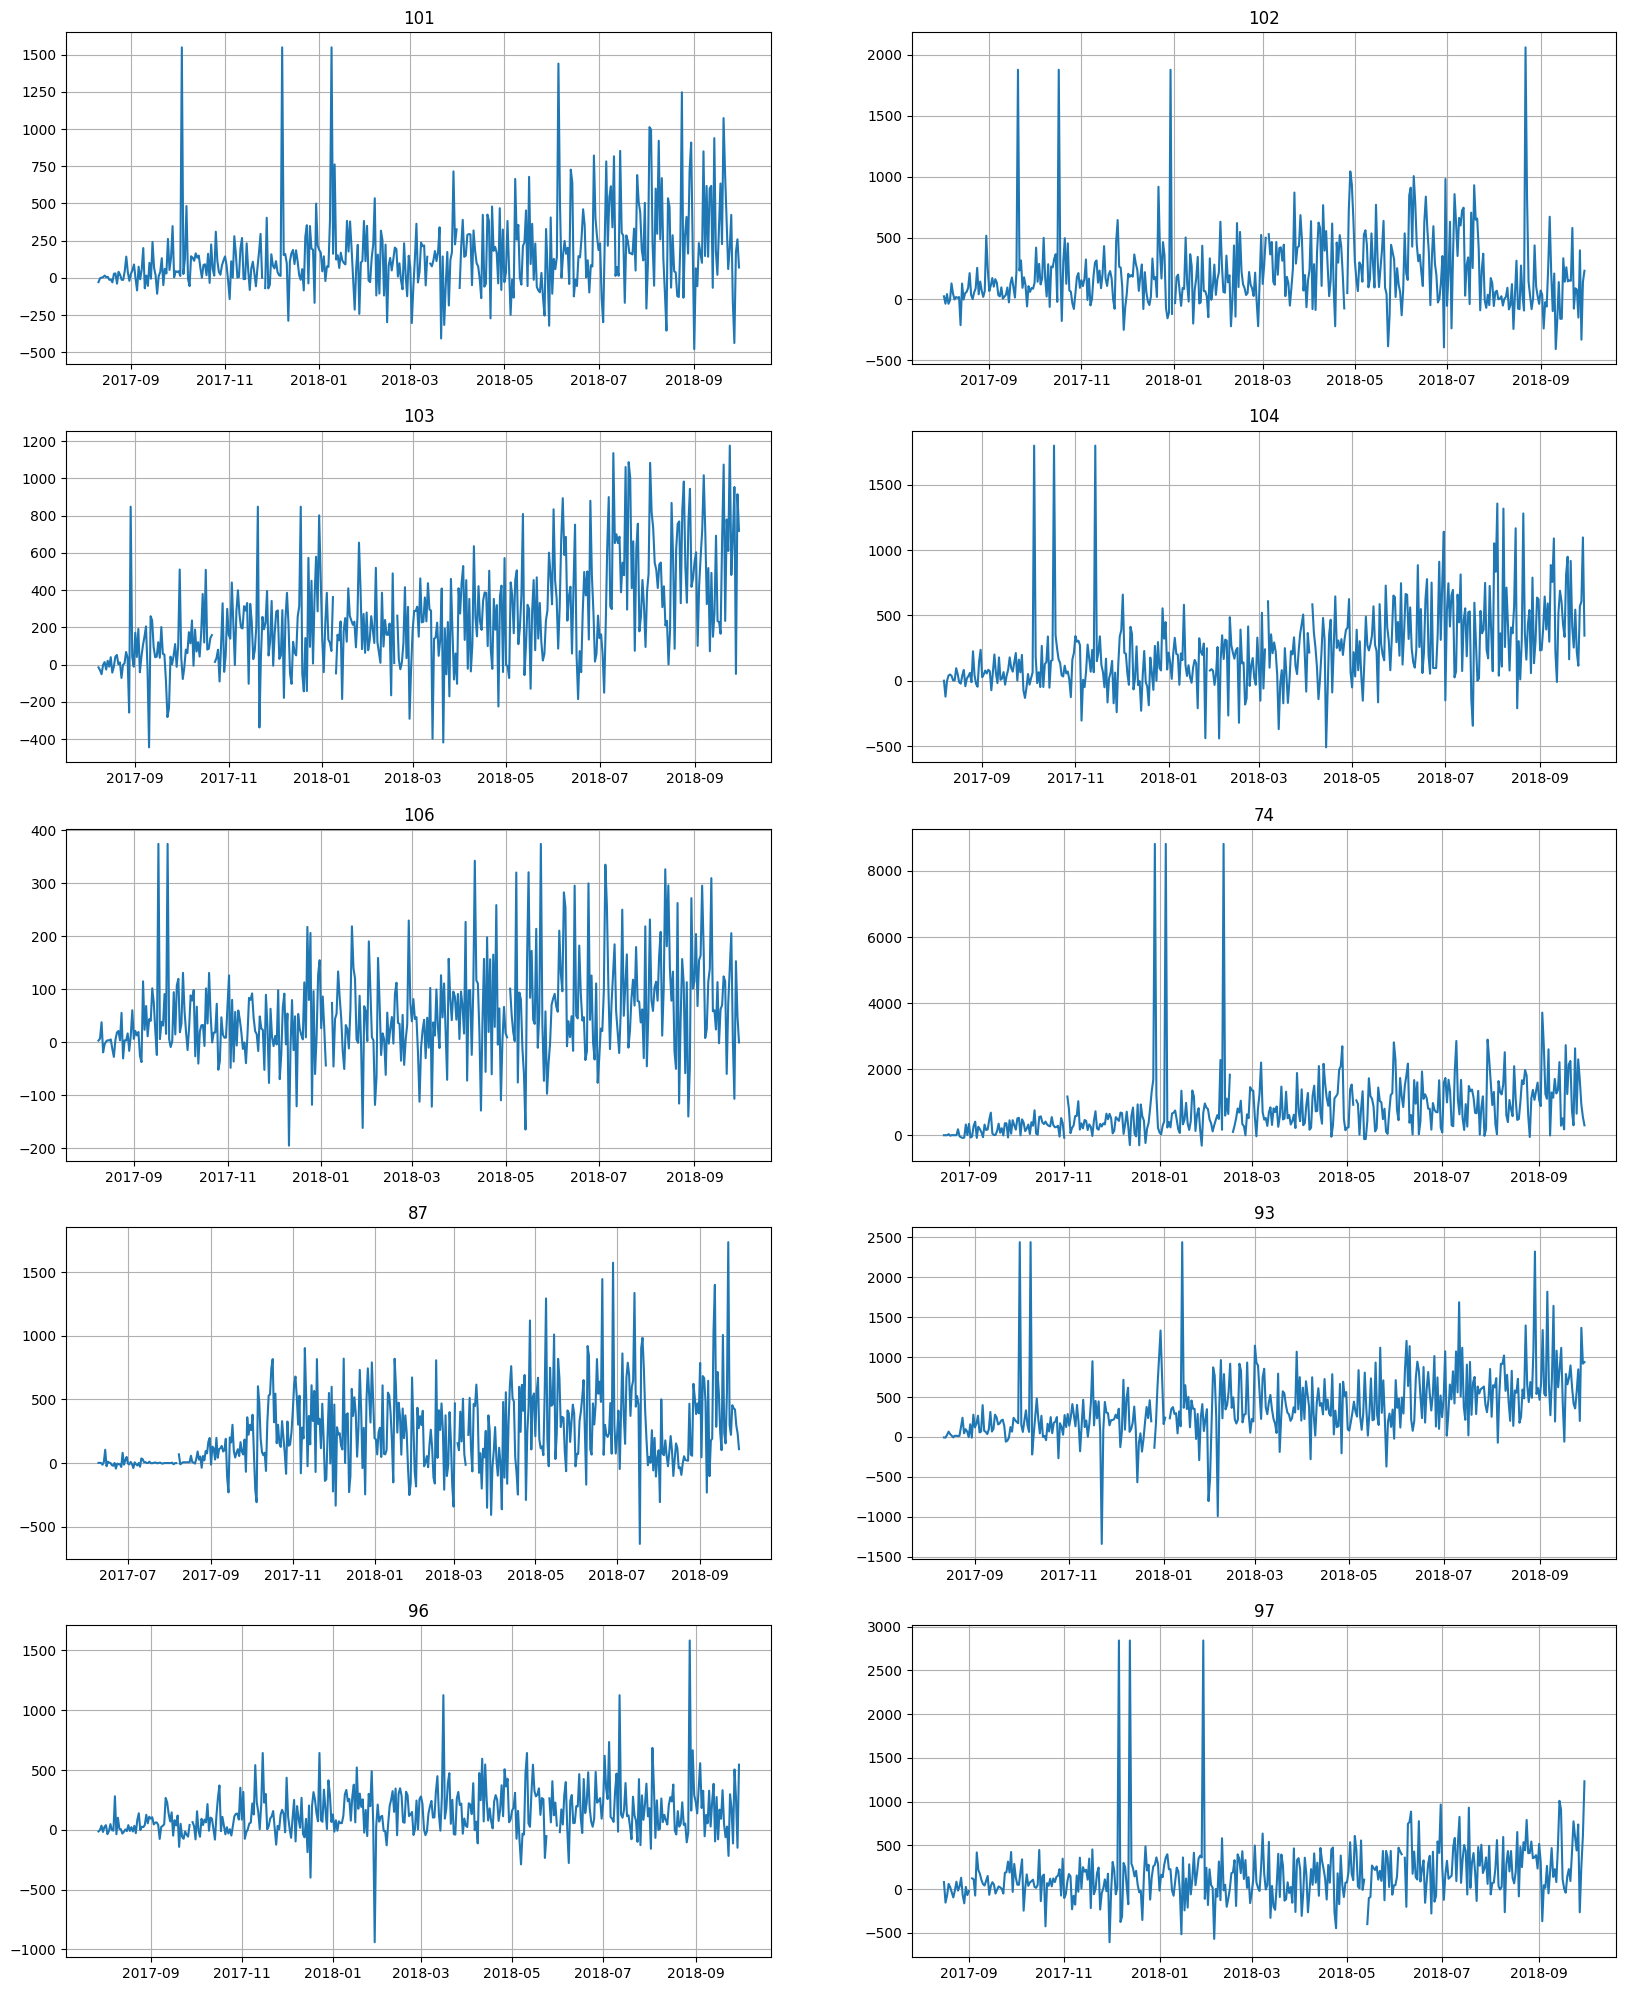

In [ ]:
ts.plot()

In [6]:
from etna.analysis import (acf_plot,
                           cross_corr_plot,
                           distribution_plot,
                           plot_correlation_matrix,
                           plot_periodogram,
                           seasonal_plot,
                           stl_plot,
                           plot_trend)
from etna.transforms import LinearTrendTransform

Автокорреляционная функция (AFC) описывает прямую связь между наблюдением и его лагом. График АФК может помочь определить extent of the lag в моделях скользящего среднего.

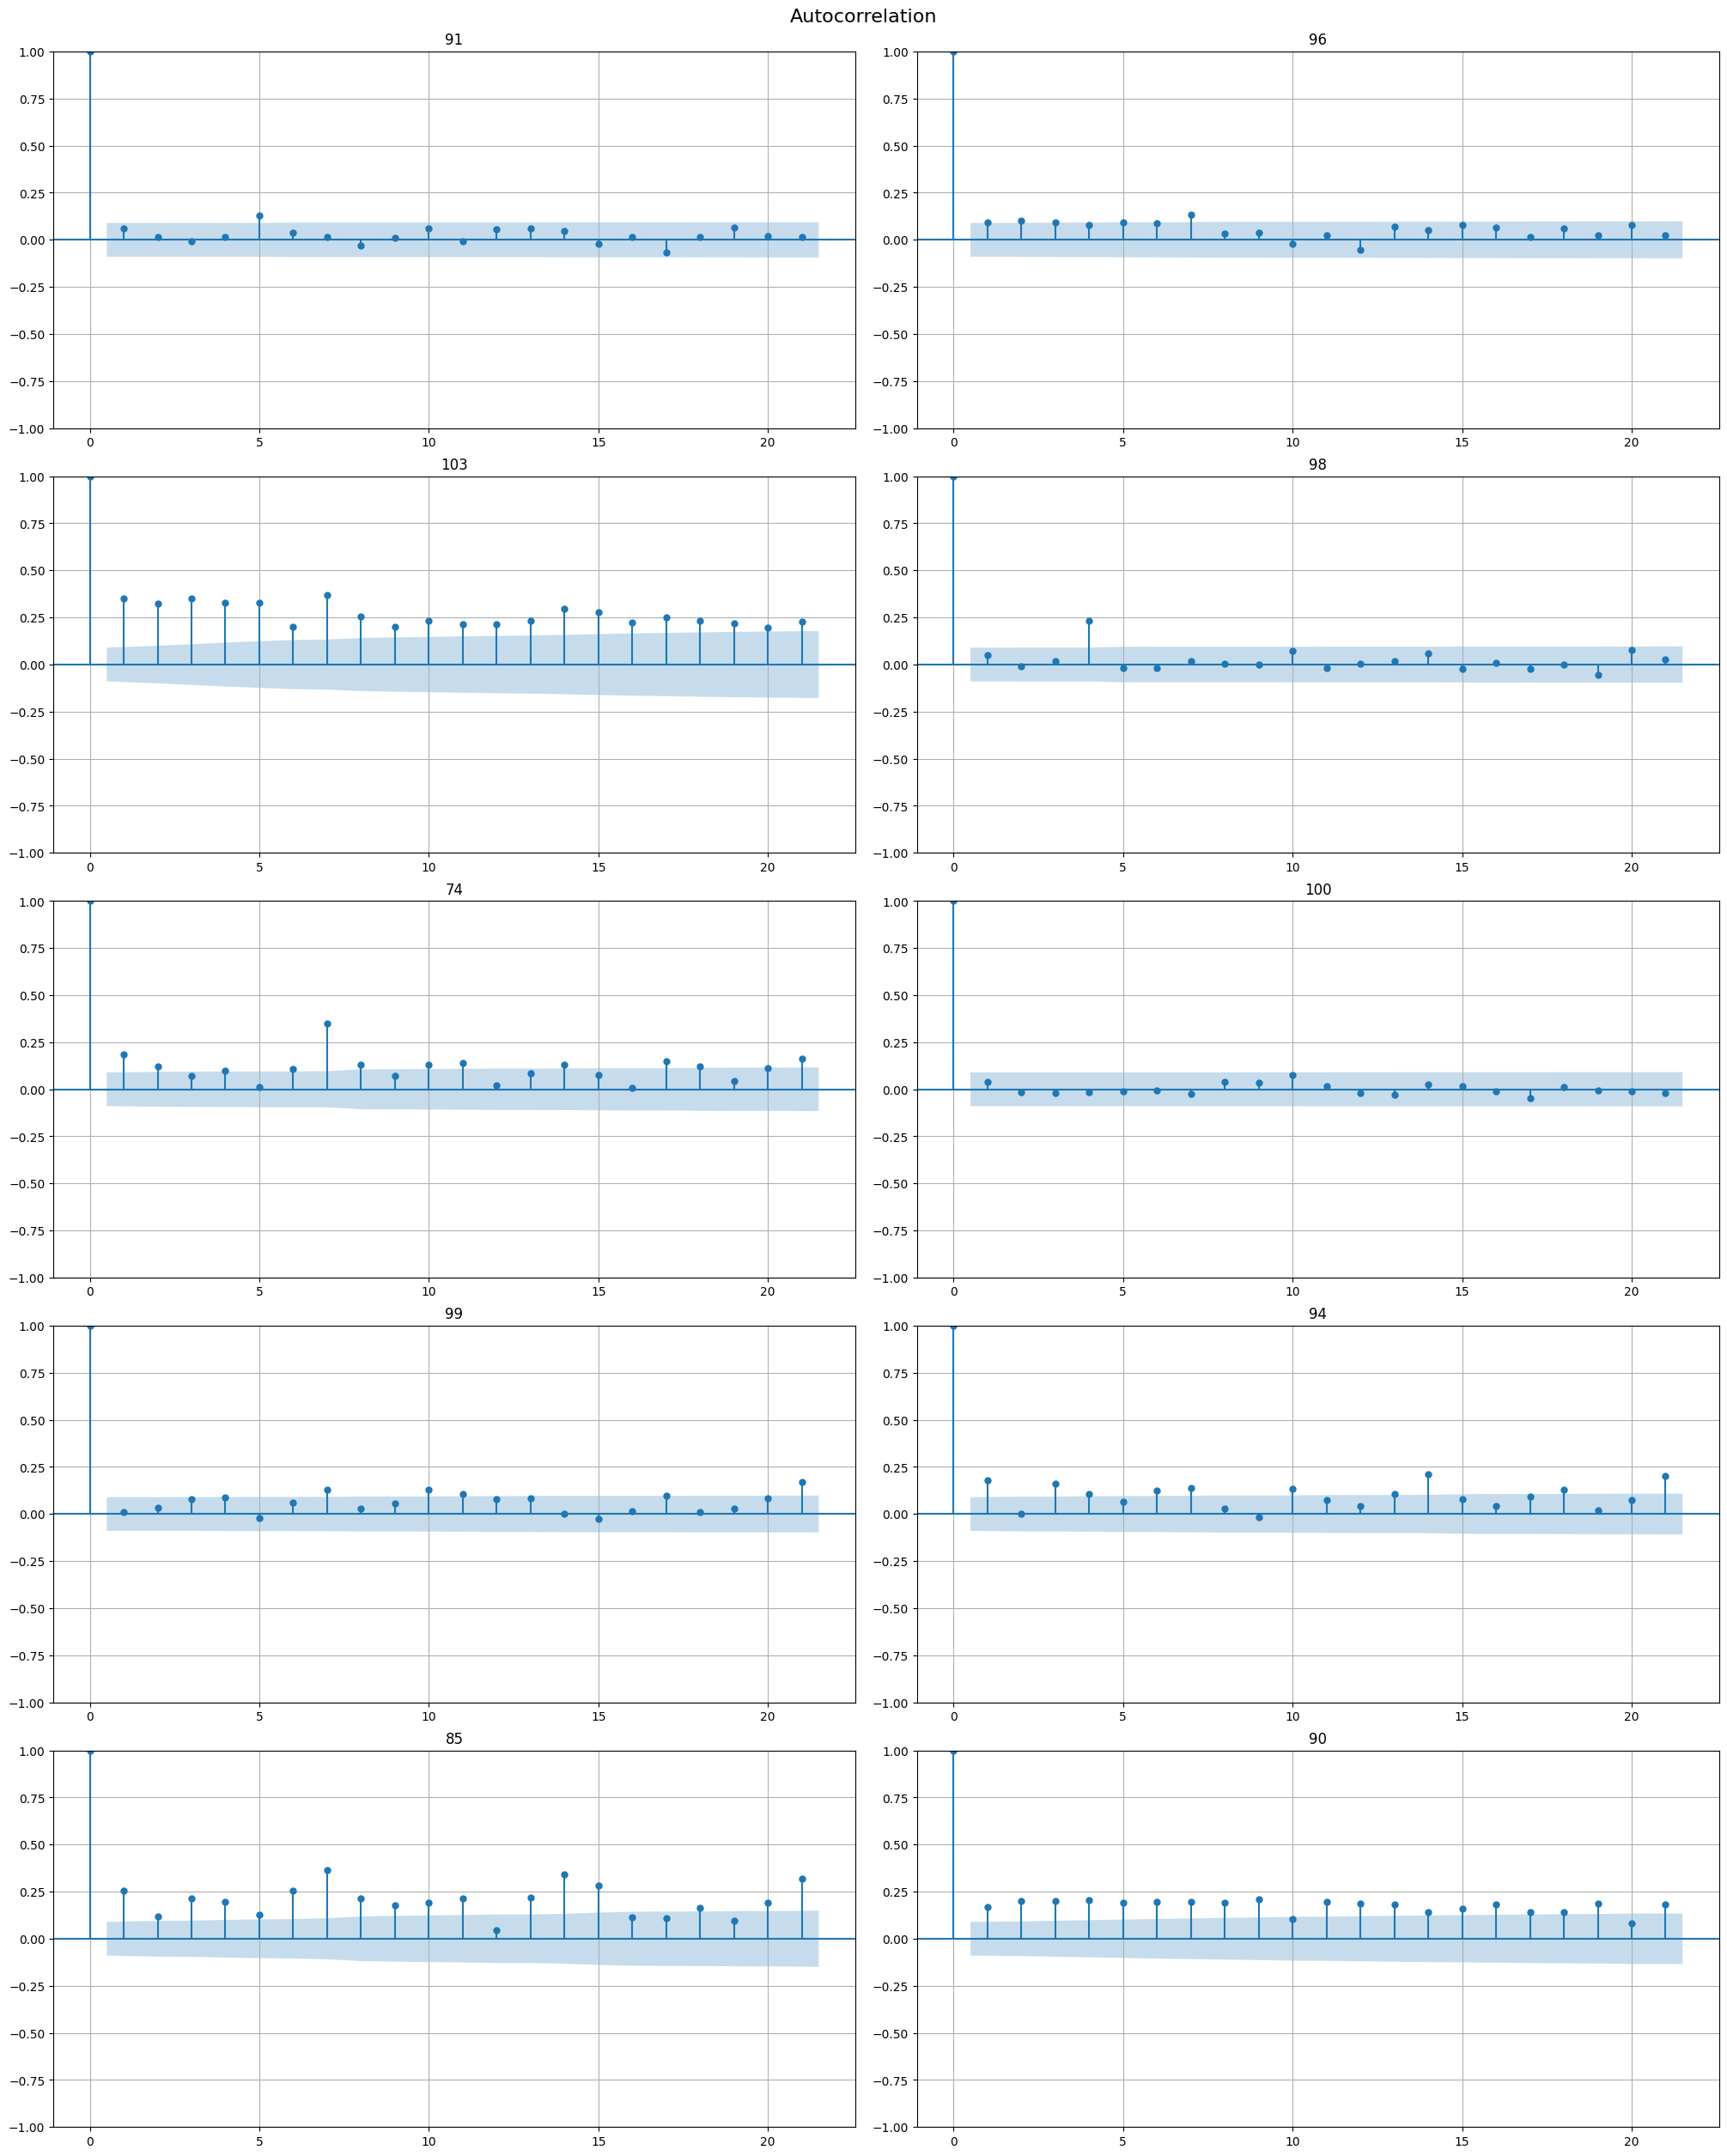

In [ ]:
acf_plot(ts, lags=21)

Большинство графиков показывают значительную автокорреляцию на лаге 1, которая постепенно уменьшается с увеличением лага. Это указывает на то, что недавние значения лучше всего предсказывают текущие значения.

Кросс-корреляция обычно используется для сравнения нескольких временных рядов и определения того, насколько хорошо они совпадают друг с другом и, в частности, в какой момент происходит наилучшее совпадение. Чем ближе значение кросс-корреляции к 1, тем более идентичны наборы.


In [ ]:
cross_corr_plot(ts, maxlags=100)

Output hidden; open in https://colab.research.google.com to view.

Многие графики показывают один или несколько пиков, что указывает на моменты, где временные ряды имеют наибольшее совпадение. Графики, на которых наибольший пик кросс-корреляции находится практически при нулевом лаге (94 vs 93), указывают на практически синхронные временные ряды. Временные ряды, у которых пики кросс-корреляции смещены, показывают задержку или опережение. Например, пик кросс-корреляции может находиться на лаге 5, то есть один ряд опережает другой на пять временных шагов.

In [ ]:
seasonal_plot(ts=ts, cycle="quarter")

Output hidden; open in https://colab.research.google.com to view.

Сезонные графики отображают временные ряды с учетом их циклических изменений, позволяя выявить паттерны и колебания, связанные с определенными временными периодами.

На многих графиках заметны пики и провалы, которые повторяются ежегодно, что указывает на сильную сезонность временного ряда. Например, сегмент 102 имеет несколько пиков, повторяющихся в одних и тех же кварталах, что свидетельствует о регулярных сезонных изменениях. Однако некоторые графики показывают более стабильные значения, что может говорить о слабой сезонности или её отсутствии. Например, сегмент 74 имеет менее выраженные сезонные изменения.

In [ ]:
trends = [
    LinearTrendTransform(in_column="target", poly_degree=1),
    LinearTrendTransform(in_column="target", poly_degree=2),
]
plot_trend(ts, trend_transform=trends)

Output hidden; open in https://colab.research.google.com to view.

А тут на графиках представлены временные ряды с наложенными линейными (LinearTrendTransform с полиномом первой степени) и квадратичными трендами (LinearTrendTransform с полиномом второй степени), что позволяет выявить основные тенденции. Линейные тренды показывают общую тенденцию увеличения или уменьшения временного ряда на протяжении рассматриваемого периода, а квадратичные тренды более гибкие и могут показывать нелинейные изменения во временном ряду. Они могут выявлять ускорение или замедление изменений, отображая изгибы и повороты в данных.

Большинство сегментов демонстрируют либо горизонтальный, либо восходящий линейный тренд, так что можно говорить о стабильности (98, 105 например) или не слишком сильном увеличении значений со временем, хотя заметном (90, 103 например). Квадратичные тренды подтверждают линейные тенденции и показывают, что иногда есть незначительные ускорения или замедления в изменениях.



### Задание 2. Работа с пропущенными значениями и выбросами (1 балл)

Проанализируйте, есть ли в данных пропущенные значения, и подберите оптимальный метод их заполнения средствами ETNA. Какие методы вы выберете и почему? Совет: возможно, лучше сохранить заполненные данные в отдельный объект, поскольку некоторые модели заполняют пропуски встроенными методами, и подача на вход "сырых" данных (на языке временных рядов это данные с нерегулярными интервалами) может принести лучший результат.

Импорты всех необходимых компонент произведите самостоятельно.

Беру скользящее среднее, потому что у некоторых сегментов есть какой-то восходящий/нисходящий тренд, а значит, просто среднее не очень подходит, пожалуй.

In [7]:
from etna.transforms import MedianOutliersTransform, TimeSeriesImputerTransform, DensityOutliersTransform

from etna.analysis.outliers import (get_anomalies_density, get_anomalies_hist,
                                    get_anomalies_median, get_anomalies_prediction_interval)

from etna.analysis import (plot_imputation, distribution_plot, plot_anomalies,
                           plot_anomalies_interactive, plot_backtest,
                           plot_correlation_matrix, plot_forecast,
                           get_residuals, plot_residuals)

In [ ]:
ts.df.isna().sum()

segment  feature
100      target     66
101      target     66
102      target     57
103      target     63
104      target     62
105      target     52
106      target     64
74       target     71
85       target     58
86       target     56
87       target      3
88       target     69
90       target     51
91       target     43
93       target     67
94       target     65
96       target     52
97       target     71
98       target     72
99       target     71
dtype: int64

In [8]:
#YOUR CODE HERE#
ts_no_nans = deepcopy(ts)

Если мы посмотрим на исходный датасет, то увидим, что часто NaN идут подряд, и пропуски есть по всем сегментам.

Звучит так, будто уместны две стратегии заполнения NaN-ов: running_mean и seasonal. Но не везде, как мы видели раньше, сезонность сильно выражена, а вот если использовать running_mean, новые значения будут не сильно отличаться от тренда временного ряда, который меняется не оч активно на протяжении времени, но меняется. Так что остановимся на running_mean.

In [9]:
nans_imputer = TimeSeriesImputerTransform(in_column="target", strategy="running_mean")

In [ ]:
plot_imputation(imputer=nans_imputer, ts=ts)

Output hidden; open in https://colab.research.google.com to view.

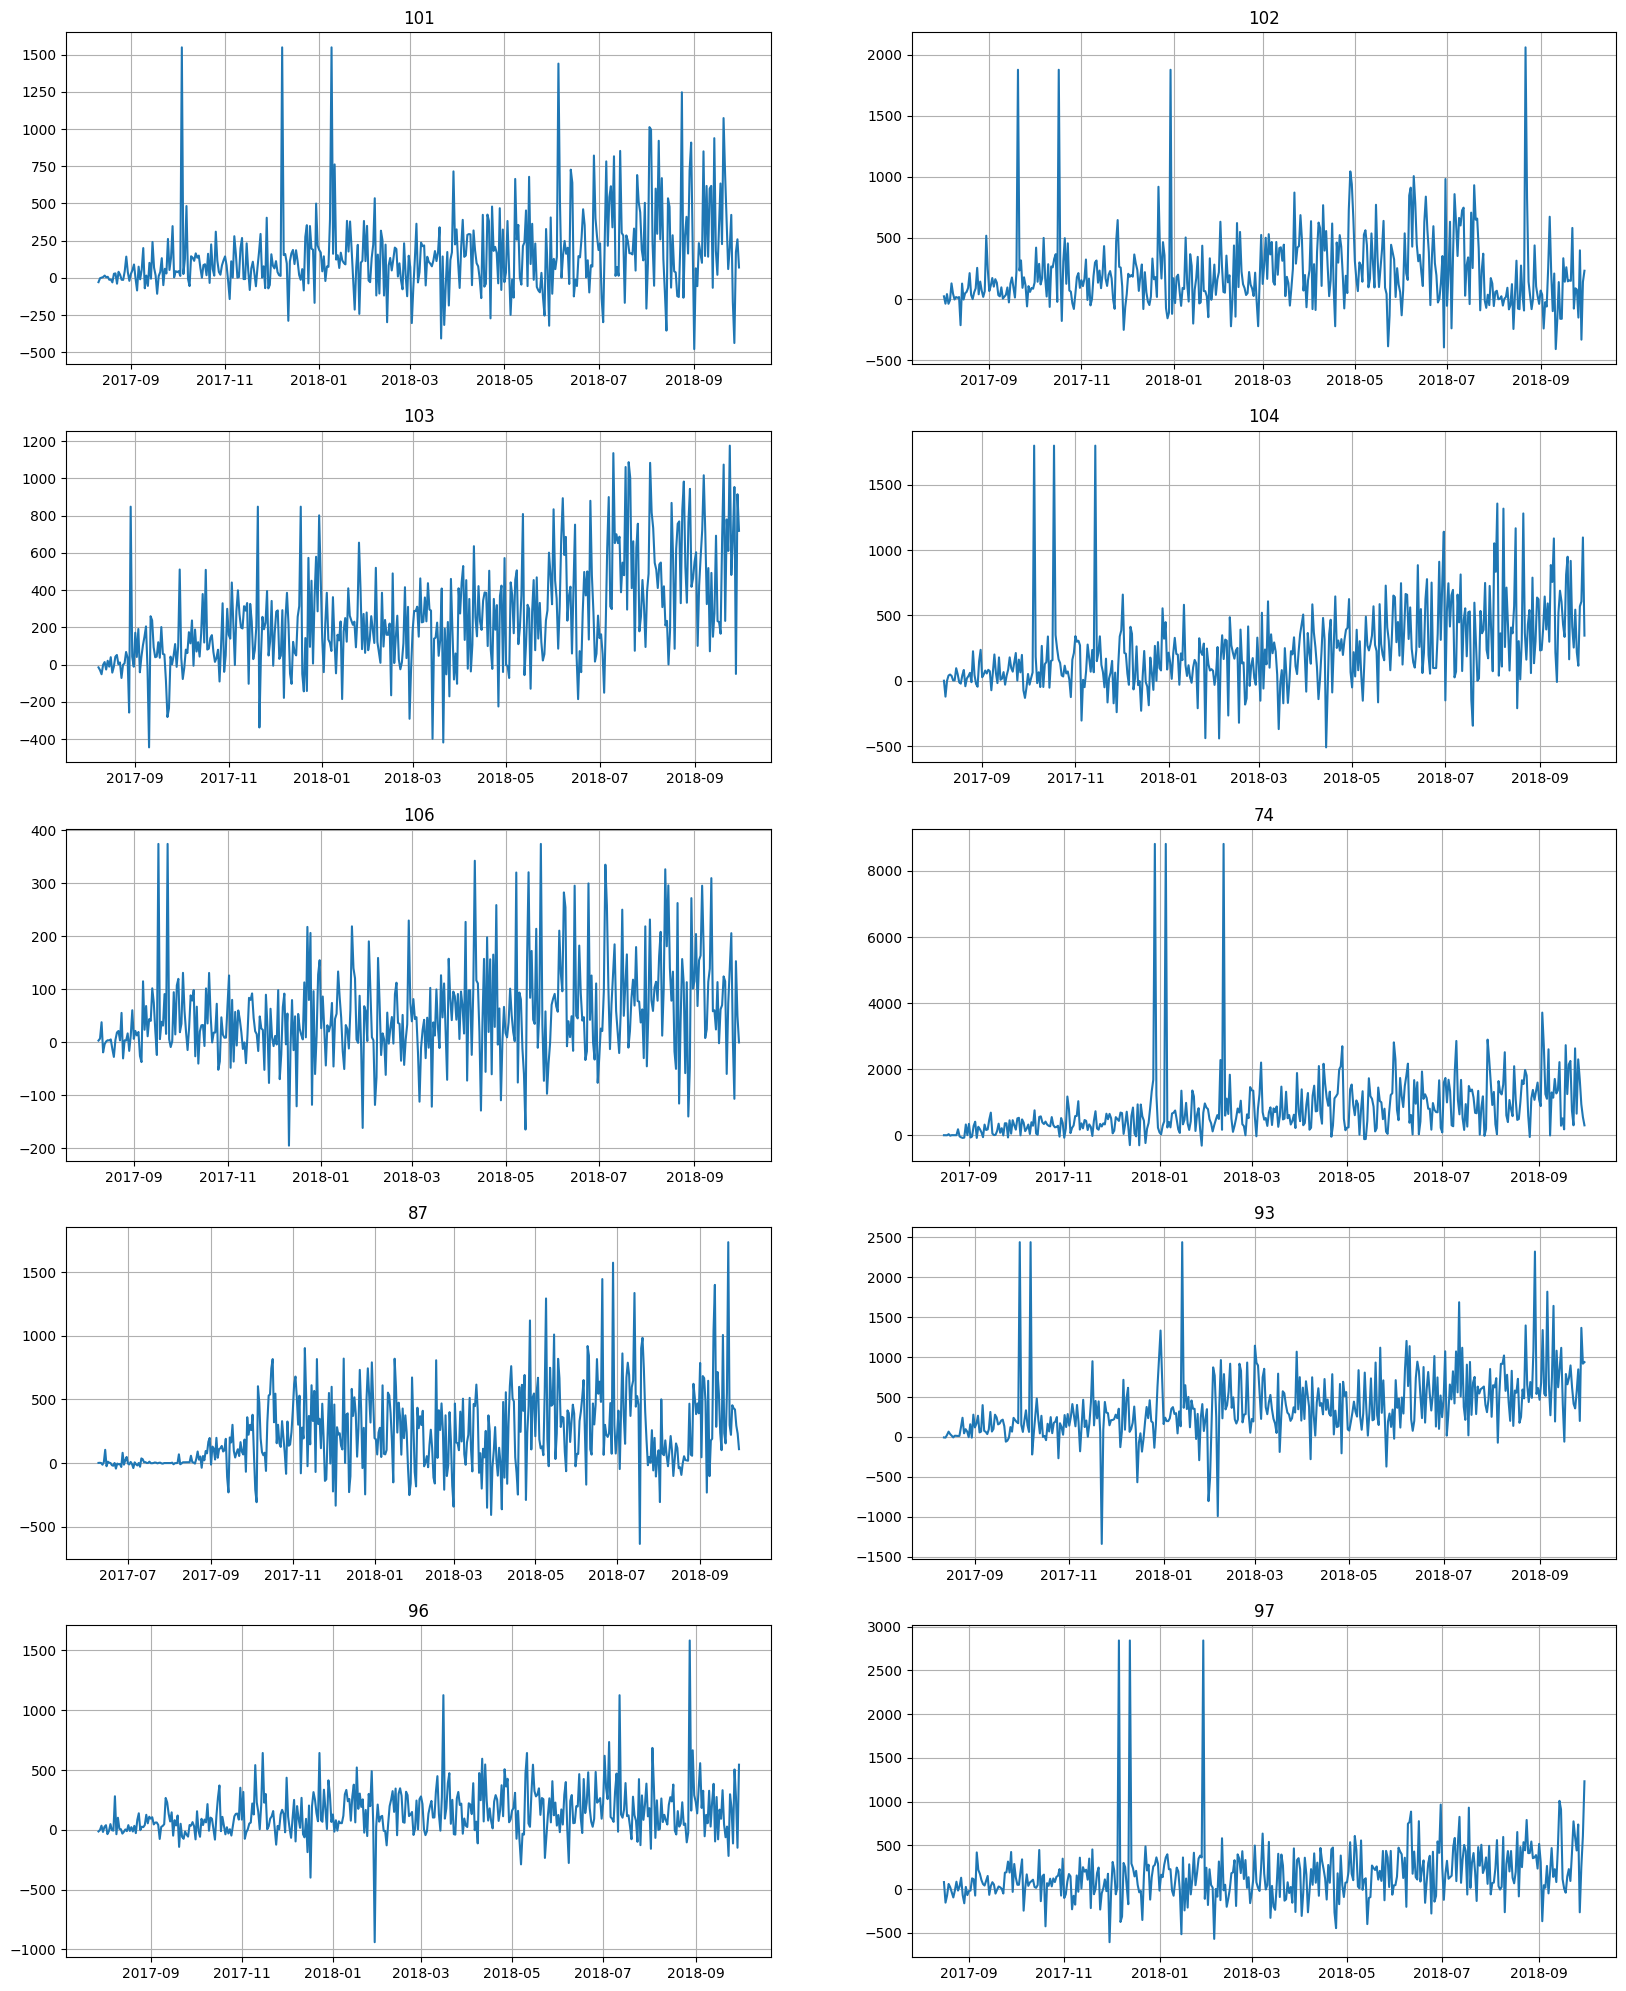

In [ ]:
ts_no_nans.fit_transform([nans_imputer])

ts_no_nans.plot()

Проверьте ряды на наличие выбросов, и очистите их соответствующим образом. Обоснуйте выбор.

Посмотрим на два варианта очистки, выберем лучший из них.

In [ ]:
#YOUR CODE HERE#
anomaly_dict = get_anomalies_median(ts_no_nans, window_size=100)
plot_anomalies(ts_no_nans, anomaly_dict)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
anomaly_dict = get_anomalies_density(ts_no_nans)
plot_anomalies(ts_no_nans, anomaly_dict)

Output hidden; open in https://colab.research.google.com to view.

Чисто визуально, медианный фильтр выявляет большее количество аномалий по сравнению с плотностью. Так что это делает его предпочтительным для выявления большого количества резких выбросов и аномалий.

In [10]:
outliers_remover = MedianOutliersTransform(in_column="target", window_size=100)
ts_no_nans.fit_transform([outliers_remover, nans_imputer])

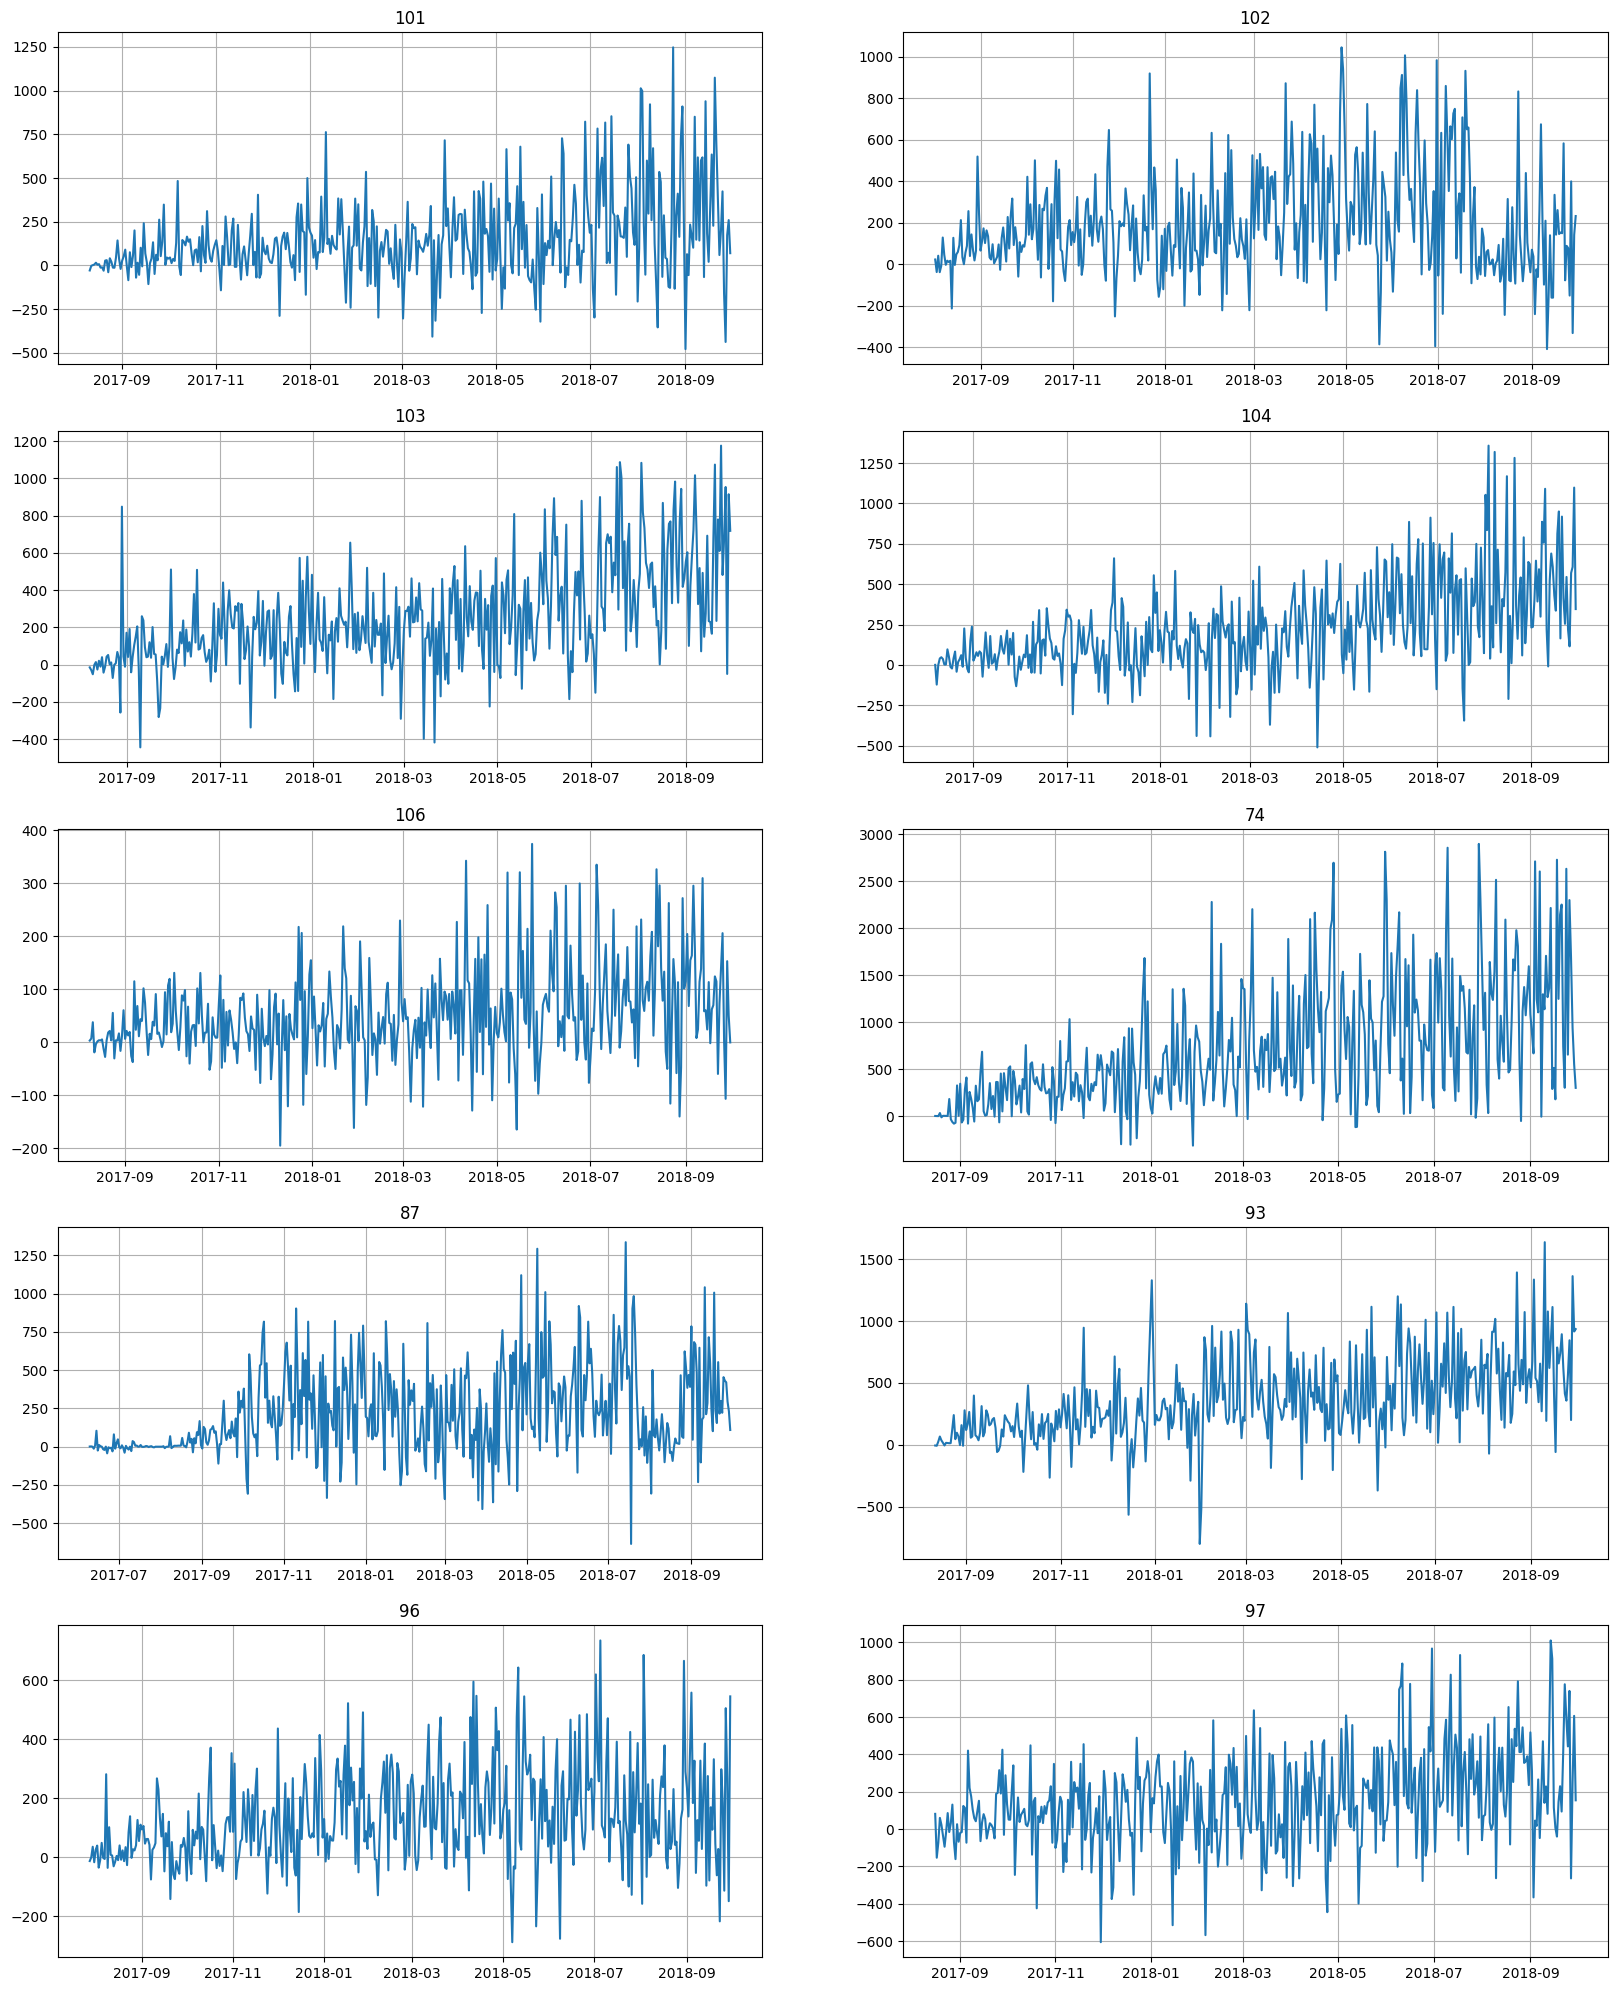

In [ ]:
ts_no_nans.plot()

### Задание 3. Построение Prophet (1.25 балла)

Постройте прогнозы с помощью Prophet и `etna.Pipeline`, под капотом `etna.Pipeline` обучит `ProphetModel` для каждого сегмента в отдельности. После этого оцените качество по SMAPE на кросс-валидации. В качестве горизонта предсказания возьмите 5 дней - этого же горизонта будем придерживаться и в дальнейшем.

Отрисуйте получившийся прогноз.

In [11]:
from etna.pipeline import Pipeline
from etna.models import ProphetModel
from etna.metrics import SMAPE, MAE
from etna.analysis import plot_backtest

In [13]:
HORIZON = 5

In [12]:
#YOUR CODE HERE#
import logging
cmdstanpy_logger = logging.getLogger("cmdstanpy")
cmdstanpy_logger.disabled = True

In [ ]:
pipeline = Pipeline(model=ProphetModel(daily_seasonality=True, yearly_seasonality=True), horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100   78.307535  253.412809
1      101   85.478507  281.235675
2      102  134.719308  211.918767
3      103   60.402660  307.297081
4      104   46.871232  230.014091
5      105   80.189520  243.786741
6      106   89.822403   77.326143
7       74   60.219171  681.389820
8       85   43.291443  214.672810
9       86   47.429548  124.682758
10      87   52.985377  184.908025
11      88   71.178143  197.908888
12      90   54.058453  176.856637
13      91   82.594001  167.850870
14      93   46.363425  267.741166
15      94   57.512613  198.445132
16      96  125.213031  191.840051
17      97   90.893286  277.757906
18      98   77.522192  173.961075
19      99  120.951149  333.145217

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      7.530015e+01
MAE        2.398076e+02
dtype: float64

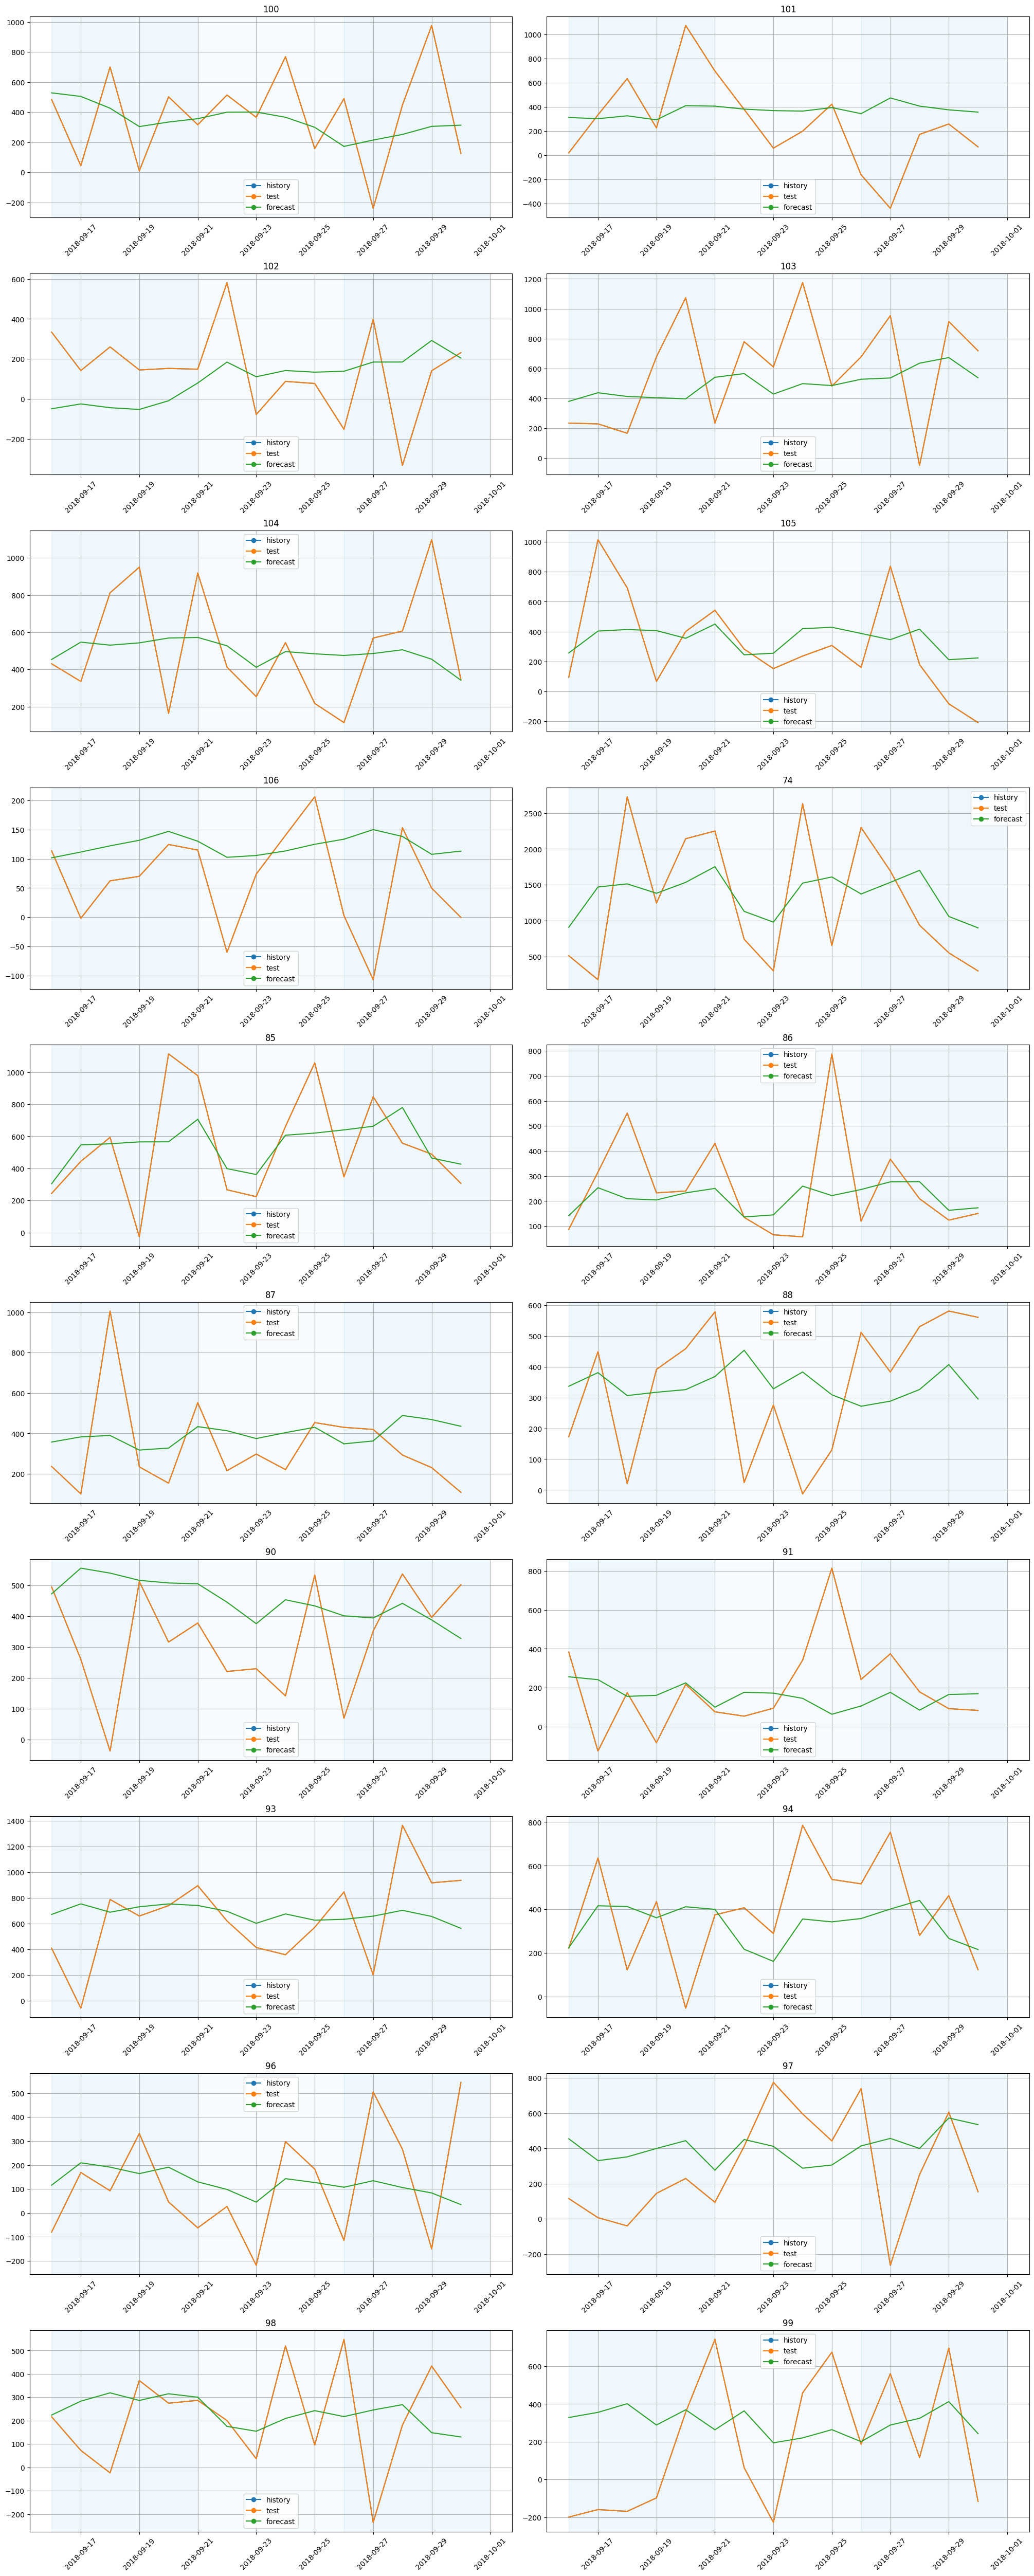

In [ ]:
plot_backtest(forecast_df, ts_no_nans)

Исходя из статистики по каждому ряду, какой можно сделать вывод о том, как лучше предсказывать итоговое значение? Посчитайте то же самое исходя из MAE.

**Выводы**

Есть случаи, когда по обеим метрикам на сегменте показываются хорошие результаты, например, таким сегментом является 85. А есть случаи, когда одна из метрик показывает худший результат. По идее, бывает так, что высокие значения SMAPE указывают на значительные относительные ошибки, а низкие значения MAE показывают хорошие абсолютные предсказания, даже несмотря на высокие SMAPE.

Если опираться на MAE, видно, что модель лучше всего справляется с предсказанием:
+ Сегмент 106: 77.33
+ Сегмент 86: 124.68
+ Сегмент 90: 176.86
+ Сегмент 91: 167.85

А если опираться на SMAPE:
+ Сегмент 85: 43.29
+ Сегмент 86: 47.43
+ Сегмент 93: 46.36
+ Сегмент 104: 46.87

То есть модель намного лучше справляется с предсказанием некоторых сегментов, в частности по обеим метрикам очень хорошо с 86, чем сразу с предсказанием итогового значения, следовательно, логичнее в начале предсказывать те сегменты, где перформанс модели лучше, а потом уже считать итоговое значение, которое можно будет определить как сумму других сегментов, короче, мы сейчас приходим к логике иерархического временного ряда как раз.

### Задание 4. Иерархический временной ряд (2 балла)

Вопрос, поставленный в прошлом задании, тем не менее, естественным образом подводит нас к концепции **иерархического временного ряда** (когда один ряд состоит из других в качестве компонент). Это полезная концепция, которая может встретиться во многих задачах. В этом задании вам предстоит самостоятельно разобраться в деталях ее реализации в ETNA с использованием справочных материалов, предоставляемых библиотекой (как это часто бывает на практике). Они содержатся по следующей ссылке:

https://github.com/etna-team/etna/blob/master/examples/303-hierarchical_pipeline.ipynb

На выходе из первой части задания необходимо получить `TSDataset` с иерархической структурой, а также соответствующий реконсилятор, который позволит собирать искомый ряд из составных компонент. Классы, которые вам понадобятся, импортированы ниже.

In [14]:
from etna.datasets import HierarchicalStructure
from etna.pipeline import HierarchicalPipeline
from etna.reconciliation import TopDownReconciliator

In [ ]:
#YOUR CODE HERE#
hierarchical_structure = HierarchicalStructure(
    level_structure={"total": metrics_df.segment.unique()}, level_names=["total", "atm"]
)

hierarchical_structure

HierarchicalStructure(level_structure = {'total': array(['100', '101', '102', '103', '104', '105', '106', '74', '85', '86',
       '87', '88', '90', '91', '93', '94', '96', '97', '98', '99'],
      dtype=object)}, level_names = ['total', 'atm'], )

In [ ]:
hierarchical_ts = TSDataset(df=df, freq="D", hierarchical_structure=hierarchical_structure)

hierarchical_ts.head()

segment       100    101    102    103    104    105    106     74     85  \
feature    target target target target target target target target target   
timestamp                                                                   
2017-06-09    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-11    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-12    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-13    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

segment        86         87     88     90     91     93     94     96     97  \
feature    target     target target target target target target target target   
timestamp                                                                       
2017-06-09    NaN   0.617780    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-10    NaN   1.441486    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-11    NaN  -0.235345    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-12    NaN -13.532317    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-06-13    NaN   7.398647    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

segment        98     99  
feature    target target  
timestamp                 
2017-06-09    NaN    NaN  
2017-06-10    NaN    NaN  
2017-06-11    NaN    NaN  
2017-06-12    NaN    NaN  
2017-06-13    NaN    NaN

In [ ]:
hierarchical_ts.df -= hierarchical_ts.df.min().min()

Во второй части задания примените найденные на предыдущих этапах преобразования очистку от выбросов уже к иерархическому датасету, и запустите на нем Prophet с MAE на кросс-валидации.

In [ ]:
ahp_reconciliator = TopDownReconciliator(
    target_level="atm", source_level="total", method="AHP", period=6
)

pipeline = HierarchicalPipeline(
    transforms=[outliers_remover, nans_imputer],
    reconciliator=ahp_reconciliator,
    model = ProphetModel(daily_seasonality=True, yearly_seasonality=True)
)

In [ ]:
#YOUR CODE HERE#
ahp_metrics, _, _ = pipeline.backtest(ts=hierarchical_ts, metrics=[MAE()], n_folds=3, aggregate_metrics=True)
ahp_metrics = ahp_metrics.set_index("segment").add_suffix("_ahp")

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
ahp_metrics

MAE_ahp
segment            
100      285.172070
101       72.192483
102      306.870464
103      421.215336
104      314.618404
105      377.387243
106       40.619978
74       858.599873
85       197.620584
86       138.736141
87       258.507975
88       227.841966
90       140.850455
91       247.198131
93       419.881459
94       289.176433
96       275.541328
97       444.273097
98       118.826438
99       380.750846

In [ ]:
ahp_metrics.mean()

MAE_ahp    290.794035
dtype: float64

### Задание 5. Построение признаков (1.5 балла)

Вернемся к нашему исходному мультисегментному ряду - теперь поработаем с моделями, которые требуют построения признаков - `ARIMA` и `CatBoost`. Построим для них признаки, и попробуем при помощи них добиться улучшения качества.

Из обязательного:
1) постройте графики автокорреляции и при помощи них обоснуйте выбор лаговых признаков
2) для катбуста включите в признаки результаты STL разложения. STL используем для убирания тренда за счет преобразования на месте.
* Кроме этого, подумайте на экспертном уровне,
    - Какие еще закономерности могут присутствовать и почему?
    - Что из этого кажется более предсказуемым, и почему?
    - Cделайте соответствующие признаки, и снабдите их кратким комментарием.

3) После этого, обучите на получившихся признаках модели. Для `CatBoost` рассмотрите 2 версии мультисегментную и на каждый ряд в отдельности.

Ниже приведены импорты, которые вам точно понадобятся - к ним необходимо добавить те инструменты, которые вы дополнительно решите использовать в анализе.

In [15]:
from etna.analysis import acf_plot, stl_plot
from etna.ensembles import DirectEnsemble, StackingEnsemble, VotingEnsemble
from etna.models import (CatBoostMultiSegmentModel, CatBoostPerSegmentModel,
                         AutoARIMAModel)
from etna.transforms import STLTransform, LagTransform, SegmentEncoderTransform

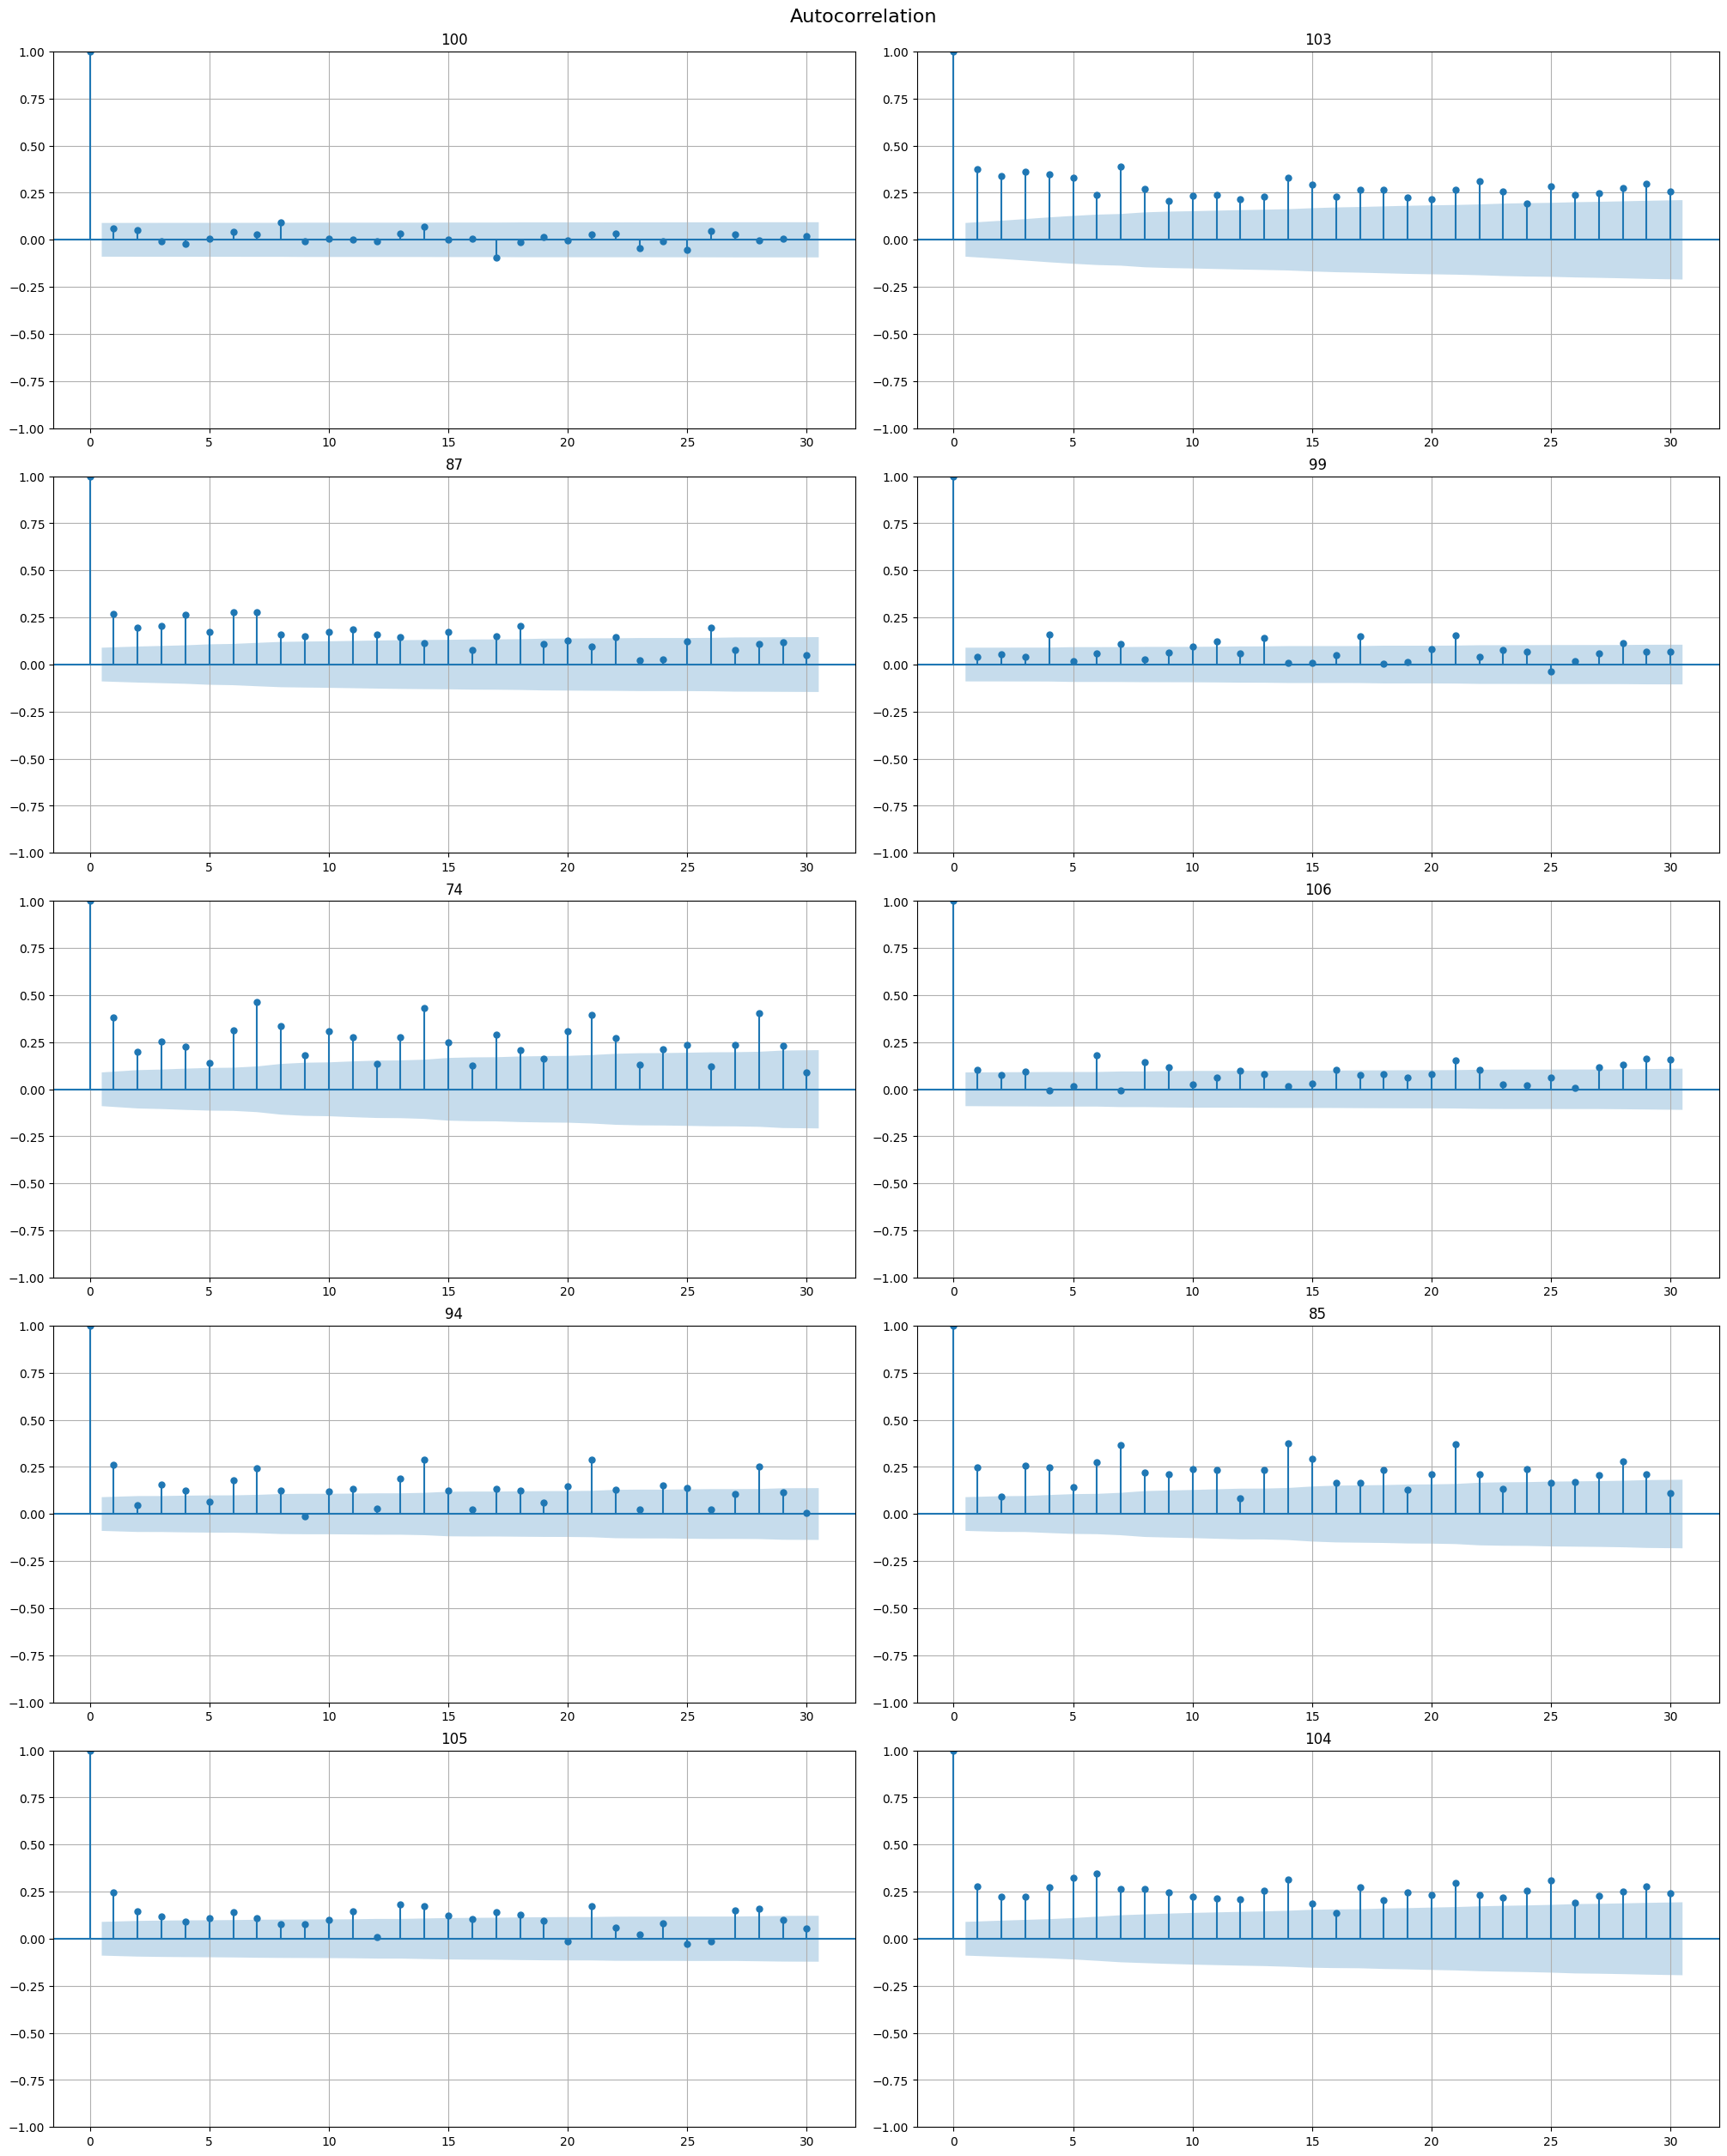

In [ ]:
#YOUR CODE HERE#
acf_plot(ts_no_nans, lags = 30)

In [ ]:
stl_plot(ts=ts_no_nans, period=7)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
NUM_OF_LAGS = 21

**Анализ автокорреляции:**

Сегменты с высокими лагами: в сегментах 100, 87, 74, 85, 94, 99, 106, 105, 104, 103 видно, что автокорреляция значима для первых 5-10 лагов, но мы будем смотреть на диапазон побольше, начиная с пяти и заканчивая 26.

In [ ]:
transforms = [LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           SegmentEncoderTransform()]

model = AutoARIMAModel()

pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   45.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100  102.778300  303.188010
1      101  100.521307  315.365426
2      102   86.700742  165.951473
3      103   59.324439  284.511032
4      104   52.876520  258.896048
5      105   67.770811  192.997725
6      106   93.332079   70.448649
7       74   61.919450  738.821606
8       85   40.467493  187.558836
9       86   73.211094  175.216581
10      87   56.601021  200.621135
11      88   66.361209  189.441492
12      90   57.955418  196.318594
13      91   99.297388  219.539473
14      93   47.394825  290.691891
15      94   73.197565  244.484318
16      96  124.939561  222.295841
17      97  115.950033  306.908195
18      98   80.944566  167.114436
19      99  149.805735  365.540891

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      8.056748e+01
MAE        2.547956e+02
dtype: float64

In [ ]:
transforms = [LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           STLTransform(in_column="target", period=7, model="arima"),
                           SegmentEncoderTransform()]
model = CatBoostMultiSegmentModel()

pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   29.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   44.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   44.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100   76.671493  270.027316
1      101   95.372138  368.054536
2      102  147.098426  345.595209
3      103   48.855223  263.373290
4      104   77.576926  372.916980
5      105   82.673741  243.761093
6      106  117.772299  100.382777
7       74   56.824606  698.445472
8       85   58.368906  248.331913
9       86   53.639433  123.867405
10      87   77.083726  272.126739
11      88  127.682999  370.966004
12      90   59.250993  213.240033
13      91  116.374952  318.663098
14      93   54.392463  440.194305
15      94   75.093960  252.799314
16      96  117.167039  212.869891
17      97  126.573898  482.320190
18      98   84.671163  215.573711
19      99  123.591673  385.061249

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      8.883680e+01
MAE        3.099285e+02
dtype: float64

In [ ]:
transforms = [LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           STLTransform(in_column="target", period=7, model="arima")]
model = CatBoostPerSegmentModel()

pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.2min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  6.4min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  6.4min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   21.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   21.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100   91.006561  298.335356
1      101  106.296540  395.772547
2      102  150.892720  362.662857
3      103   52.982023  276.658563
4      104   64.208685  315.368629
5      105   84.985266  247.119659
6      106  126.131246  110.901951
7       74   55.210640  715.331426
8       85   58.950273  262.591608
9       86   63.434778  172.171477
10      87   75.084872  251.149181
11      88  136.493176  356.719752
12      90   60.619751  230.275008
13      91  110.819412  270.586229
14      93   57.925244  461.522532
15      94   86.314417  281.202578
16      96  120.790977  214.239011
17      97  123.840323  469.264246
18      98   86.081976  205.532485
19      99  124.292866  388.659385

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      9.181809e+01
MAE        3.143032e+02
dtype: float64

А тут вот дополнительные признаки: выбран такой, потому что конкретные даты тоже могут быть важны, например, праздники.

In [17]:
from etna.transforms import DateFlagsTransform

d_flags = DateFlagsTransform(
    day_number_in_week=True,
    day_number_in_month=True,
    week_number_in_month=True,
    week_number_in_year=True,
    month_number_in_year=True,
    year_number=True,
    special_days_in_week=[5, 6],
)

transforms = [LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           d_flags, STLTransform(in_column="target", period=7, model="arima")]

model = CatBoostPerSegmentModel()

pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  6.0min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  9.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  9.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s


In [18]:
metrics_df

segment       SMAPE         MAE
0      100  102.060127  319.544653
1      101  105.856333  402.311211
2      102  147.409867  372.757225
3      103   51.552449  260.902603
4      104   64.035795  311.817654
5      105   91.271595  249.514721
6      106  127.976290  106.796202
7       74   53.631927  671.753645
8       85   47.492555  246.882027
9       86   58.920368  163.746000
10      87   78.935352  243.918512
11      88  134.875358  369.056565
12      90   62.169414  230.018870
13      91  113.851981  276.174355
14      93   56.453690  444.703309
15      94   79.350909  264.467237
16      96  131.615573  234.152045
17      97  119.741518  466.302256
18      98   89.482973  214.898417
19      99  116.032934  387.847378

In [19]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      9.163585e+01
MAE        3.118782e+02
dtype: float64

### Задание 6. Стратегии прогнозирования (1.25 балла)

Как нам известно по семинарским занятиям, при построении прогноза на горизонте дальше следующего наблюдения перед нами встает задача определиться со стратегией генерации прогноза. Попробуйте разные стратегии на нашем горизонте из 5 дней (прямая, рекурсивная). Какая стратегия в совокупности с какой моделью дает лучший результат?

Учитывайте особенности, которые некоторые стратегии могут накладывать на признаки (в частности, на лаговые переменные).

При необходимости, в смешанном методе пользуйтесь упрощенной схемой спецификации моделей/преобразований.

Прямая стратегия была в предыдущих случаях, поэтому теперь будет рекурсивная. Ее отличие в том, что при ней можно делать лаги меньше горизонта, но с большим лагом падает точность.

In [ ]:
from etna.pipeline import AutoRegressivePipeline, Pipeline, assemble_pipelines
from etna.ensembles import DirectEnsemble

In [ ]:
#YOUR CODE HERE#
transforms = [LagTransform(in_column="target", lags=[i for i in range(1, 1 + NUM_OF_LAGS)]),
                           STLTransform(in_column="target", period=7, model="arima")]
model = CatBoostPerSegmentModel()

pipeline = AutoRegressivePipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.6min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  6.6min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  6.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   29.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100   93.193961  284.481122
1      101  101.462462  342.384821
2      102  150.407917  316.102795
3      103   57.552766  253.694887
4      104   62.207328  310.577689
5      105   96.097810  242.765403
6      106  130.110372   99.059712
7       74   59.896496  708.238337
8       85   62.513105  291.028729
9       86   74.674166  161.418268
10      87   71.717545  210.601636
11      88  124.138671  308.919863
12      90   66.763985  250.163659
13      91   99.314723  214.342655
14      93   51.498549  383.416227
15      94   77.578354  254.389612
16      96  125.526134  228.373993
17      97  123.946152  420.929936
18      98   86.601575  207.414181
19      99  129.749057  356.125309

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      9.224756e+01
MAE        2.922214e+02
dtype: float64

In [ ]:
transforms = [LagTransform(in_column="target", lags=[i for i in range(1, 1 + NUM_OF_LAGS)]),
                           STLTransform(in_column="target", period=7, model="arima"),
                           SegmentEncoderTransform()]
model = CatBoostMultiSegmentModel()

pipeline = AutoRegressivePipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts_no_nans, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   29.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   47.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   47.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   30.7s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE         MAE
0      100   90.941537  320.850394
1      101   96.690732  359.622009
2      102  131.308987  263.158452
3      103   46.406363  207.984755
4      104   72.280458  358.189646
5      105   87.283380  214.959834
6      106  116.766377   89.777795
7       74   59.377972  721.932760
8       85   54.997883  244.940471
9       86   71.907623  154.996478
10      87   67.195162  223.199084
11      88  108.593436  298.681380
12      90   65.209895  249.818842
13      91  111.533508  224.044622
14      93   49.082206  342.081945
15      94   71.258799  245.974327
16      96  133.333723  216.856938
17      97  118.431942  404.409901
18      98   78.310730  191.191967
19      99  123.276213  331.668564

In [ ]:
metrics_df.mean()

segment    5.005055e+44
SMAPE      8.770935e+01
MAE        2.832170e+02
dtype: float64

In [ ]:
horizons = [7, 14]

models = [CatBoostPerSegmentModel(), CatBoostPerSegmentModel()]
transforms = [
    [
        LagTransform(
            in_column="target",
            lags=[i for i in range(horizons[0], horizons[0] + NUM_OF_LAGS)],
        ),
        LagTransform(
            in_column="target",
            lags=[i for i in range(horizons[1], horizons[1] + NUM_OF_LAGS)],
        ),
    ],
]

pipelines = assemble_pipelines(models=models, transforms=transforms, horizons=horizons)

ensemble = DirectEnsemble(pipelines=pipelines)

metrics_ensemble_df, forecast_ensemble_df, _ = ensemble.backtest(ts=ts_no_nans, metrics=[SMAPE(), MAE()])

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.3min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  4.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  8.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 12.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 16.1min
[Parallel(n_jobs=1)]: Do

In [ ]:
metrics_ensemble_df

segment       SMAPE         MAE  fold_number
0      100  130.513758  278.545521            0
0      100  107.563551  280.743308            1
0      100  109.524788  207.858906            2
0      100  112.339072  353.097883            3
0      100  106.056331  275.931501            4
..     ...         ...         ...          ...
19      99  115.576043  199.732908            0
19      99  123.189338  290.307913            1
19      99  122.720564  286.171062            2
19      99  116.433882  382.115016            3
19      99  124.983464  299.790322            4

[100 rows x 4 columns]

In [ ]:
metrics_ensemble_df.mean()

segment        1.001001e+232
SMAPE           8.783039e+01
MAE             2.530262e+02
fold_number     2.000000e+00
dtype: float64

Какая опция лучше, зависит от метрики, которую мы выбираем.

### Задание 7. Ансамбли (1.25 балла)

Чтобы не выбирать лучшую модель, мы можем использовать преимущества каждой - давайте объединим все наши наработки в ансамбль. Попробуйте различные опции ансамблирования, и выберите ту, которая работает лучше всего (не забывайте, что внутри каждого ансамбля у нас тоже есть параметры, которые мы можем варьировать - веса в voting, включаемые признаки в stacking).

In [ ]:
from etna.ensembles import StackingEnsemble, VotingEnsemble

In [ ]:
#YOUR CODE HERE#
prophet_pipeline = Pipeline(model=ProphetModel(daily_seasonality=True, yearly_seasonality=True), horizon=HORIZON)
arima_pipeline = Pipeline(
    model=AutoARIMAModel(),
    transforms=[LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           SegmentEncoderTransform()], horizon = HORIZON)

pipelines = [prophet_pipeline, arima_pipeline]


voting_ensemble = VotingEnsemble(pipelines=pipelines)

In [ ]:
voting_ensamble_metrics = voting_ensemble.backtest(
    ts=ts_no_nans,
    metrics=[MAE(), SMAPE()],
    n_folds=3,
    aggregate_metrics=True,
)[0].iloc[:, 1:]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   39.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   39.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   39.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   39.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   39.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   38.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   38.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Do

In [ ]:
voting_ensamble_metrics

MAE       SMAPE
0   268.172968   85.728353
1   298.125234   91.708193
2   187.355416  110.216384
3   295.628150   59.695599
4   235.500161   48.586189
5   218.216198   74.808056
6    71.694760   89.540457
7   701.073843   60.377456
8   196.007435   40.235784
9   143.950148   56.110660
10  192.287404   54.889925
11  187.363814   66.061456
12  183.593531   55.761780
13  190.111597   92.428066
14  270.852468   45.677809
15  219.694457   64.634358
16  204.527413  121.472291
17  289.755512  100.691995
18  169.135203   78.235399
19  345.368331  131.129462

In [ ]:
voting_ensamble_metrics.mean()

MAE      243.420702
SMAPE     76.399484
dtype: float64

In [ ]:
stacking_ensemble = StackingEnsemble(pipelines=pipelines, n_folds=3)

In [ ]:
stacking_ensamble_metrics = stacking_ensemble.backtest(
    ts=ts_no_nans,
    metrics=[MAE(), SMAPE()],
    n_folds=3,
    aggregate_metrics=True
)[0].iloc[:, 1:]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   37.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Do

In [ ]:
stacking_ensamble_metrics

MAE       SMAPE
0   257.269558   81.490034
1   288.080846   88.539636
2   195.962942  124.211767
3   304.299512   60.587426
4   233.776064   47.891348
5   225.023837   76.668932
6    73.641396   89.391917
7   679.138536   59.140430
8   206.100967   41.856527
9   134.546972   51.628683
10  186.537462   54.033696
11  200.454141   70.043569
12  181.374563   55.232570
13  177.894658   88.975678
14  279.300639   47.108152
15  208.387434   60.503876
16  201.548963  124.037074
17  285.812516   96.313166
18  170.221162   78.006677
19  335.293375  124.065534

In [ ]:
stacking_ensamble_metrics.mean()

MAE      241.233277
SMAPE     75.986335
dtype: float64

stacking_ensamble работает лучше

### Задание 8*. Трансформер (бонус 2 балла)

Для желающих протестировать мощь трансформенных моделей предлагается "завести" модель из второго семинара по временным рядам на текущем датасете. На этот раз абсолютно все необходимые импорты и зависимости подгружаются на ваше усмотрение. Удалось ли вам улучшить качество по сравнению с классическими моделями / моделями на основе ML? Что бы вы предпочли внедрить в production?

*NB:* все, конечно, прекрасно знают механизм работы бонусных заданий, но порядка ряди прописать дисклеймер должны - итоговый балл за домашнее задание ставится по формуле min(10, ваш суммарный балл за задания).

In [ ]:
#YOUR CODE HERE#
from etna.models.nn import TFTNativeModel

In [ ]:
transforms=[LagTransform(in_column="target", lags=list(range(HORIZON, HORIZON + NUM_OF_LAGS))),
                           SegmentEncoderTransform()]

model = TFTNativeModel(
    encoder_length = HORIZON,
    decoder_length = HORIZON,
    num_layers = 8,
    hidden_size = 32,
    lr = 0.01,
    num_embeddings = {'segment': 365},
    train_batch_size = 128,
    test_batch_size = 16,
    trainer_params=dict(max_epochs=20),
)

In [ ]:
pipeline = Pipeline(model=model, transforms = transforms, horizon=HORIZON)
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=ts, metrics=[SMAPE(), MAE()], n_folds=3)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                            | Type                     | Params
------------------------------------------------------------------------------
0  | loss                            | MSELoss                  | 0     
1  | static_scalers                  | ModuleDict               | 0     
2  | static_embeddings               | ModuleDict               | 0     
3  | time_varying_scalers_encoder    | ModuleDict               | 64    
4  | time_varying_embeddings_encoder | ModuleDict               | 0     
5  | time_varying_scalers_decoder    | ModuleDict               | 0     
6  | time_varying_embeddings_decoder | Modu

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.6min
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                            | Type                     | Params
------------------------------------------------------------------------------
0  | loss                            | MSELoss                  | 0     
1  | static_scalers                  | ModuleDict               | 0     
2  | static_embeddings               | ModuleDict               | 0     
3  | time_varying_scalers_encoder    | ModuleDict               | 64    
4  | time_varying_embeddings_encoder 

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.3min
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                            | Type                     | Params
------------------------------------------------------------------------------
0  | loss                            | MSELoss                  | 0     
1  | static_scalers                  | ModuleDict               | 0     
2  | static_embeddings               | ModuleDict               | 0     
3  | time_varying_scalers_encoder    | ModuleDict               | 64    
4  | time_varying_embeddings_encoder 

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.9min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s


In [ ]:
metrics_df

segment       SMAPE          MAE  fold_number
0      100  110.401797   276.866877            0
0      100   54.611585   209.066632            1
0      100   99.933242   353.448188            2
1      101   84.125609   309.231210            0
1      101   66.344956   197.418387            1
1      101  111.577470   280.640509            2
2      102   37.904698    80.918402            0
2      102  106.921519   221.576626            1
2      102  102.776531   258.560269            2
3      103   54.566513   274.654540            0
3      103   76.543049   409.806785            1
3      103  121.549568   506.339339            2
4      104   69.329966   322.998038            0
4      104   49.848879   229.971126            1
4      104   76.459426   343.918936            2
5      105   93.436770   339.196461            0
5      105   31.930901    98.067652            1
5      105  117.892838   314.219259            2
6      106  114.920711   176.096811            0
6      106   92.771811   158.881526            1
6      106  156.752656   240.984955            2
7       74  111.966812  1139.899970            0
7       74  105.536764  1061.615787            1
7       74  100.961888   895.823825            2
8       85   93.283921   336.742996            0
8       85   69.379912   395.934935            1
8       85   56.823547   248.873176            2
9       86   41.295403   111.470560            0
9       86   91.966455   242.852398            1
9       86   50.921975   109.269383            2
10      87   52.868925   205.758009            0
10      87   61.846708   411.179271            1
10      87   40.592945   109.145458            2
11      88   73.250079   171.176901            0
11      88  103.195219   193.295926            1
11      88   64.032122   252.432733            2
12      90   72.395814   174.164734            0
12      90   38.284021   114.748413            1
12      90   63.727404   186.473358            2
13      91  119.270647   408.918233            0
13      91   92.169488   236.461766            1
13      91   55.341821   111.458082            2
14      93  108.086673   380.119200            0
14      93   70.689279   316.832373            1
14      93   98.404794   615.639197            2
15      94   84.214181   205.642593            0
15      94   54.390526   225.006778            1
15      94   59.637041   222.009158            2
16      96   99.354560   170.672871            0
16      96  121.912700   225.781577            1
16      96  107.204379   263.385118            2
17      97  105.258147   158.963721            0
17      97   75.109365   273.954090            1
17      97  101.903178   466.188584            2
18      98   74.604427   126.134423            0
18      98   68.853112   145.498119            1
18      98   71.880841   208.374979            2
19      99  167.039063   346.186802            0
19      99  113.458984   357.268529            1
19      99   94.620091   265.943083            2

In [ ]:
metrics_df.mean()

segment        1.668335e+138
SMAPE           8.443890e+01
MAE             2.949027e+02
fold_number     1.000000e+00
dtype: float64